In [27]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [28]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [29]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [30]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [31]:
# reflect an existing database into a new model/ instentiate the automap base
base = automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

In [32]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [33]:
# Save references to each table
Measurement = base.classes.measurement
Station = base.classes.station

In [34]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Precipitation Analysis

In [35]:
# Find the most recent date in the data set.
#session.execute("SELECT max(date)  from measurement").first()
session.query(func.max(Measurement.date)).first()

('2017-08-23',)

In [37]:
session.query((Measurement.date))\
    .filter(Measurement.date> "2017-01-01")\
    .all()

[('2017-01-02',),
 ('2017-01-03',),
 ('2017-01-04',),
 ('2017-01-05',),
 ('2017-01-06',),
 ('2017-01-07',),
 ('2017-01-08',),
 ('2017-01-09',),
 ('2017-01-10',),
 ('2017-01-11',),
 ('2017-01-12',),
 ('2017-01-13',),
 ('2017-01-14',),
 ('2017-01-15',),
 ('2017-01-16',),
 ('2017-01-17',),
 ('2017-01-18',),
 ('2017-01-19',),
 ('2017-01-20',),
 ('2017-01-21',),
 ('2017-01-22',),
 ('2017-01-23',),
 ('2017-01-24',),
 ('2017-01-25',),
 ('2017-01-26',),
 ('2017-01-27',),
 ('2017-01-28',),
 ('2017-01-29',),
 ('2017-01-30',),
 ('2017-01-31',),
 ('2017-02-01',),
 ('2017-02-02',),
 ('2017-02-03',),
 ('2017-02-04',),
 ('2017-02-05',),
 ('2017-02-06',),
 ('2017-02-07',),
 ('2017-02-08',),
 ('2017-02-09',),
 ('2017-02-10',),
 ('2017-02-11',),
 ('2017-02-12',),
 ('2017-02-13',),
 ('2017-02-14',),
 ('2017-02-15',),
 ('2017-02-16',),
 ('2017-02-17',),
 ('2017-02-18',),
 ('2017-02-19',),
 ('2017-02-20',),
 ('2017-02-21',),
 ('2017-02-22',),
 ('2017-02-23',),
 ('2017-02-24',),
 ('2017-02-25',),
 ('2017-02

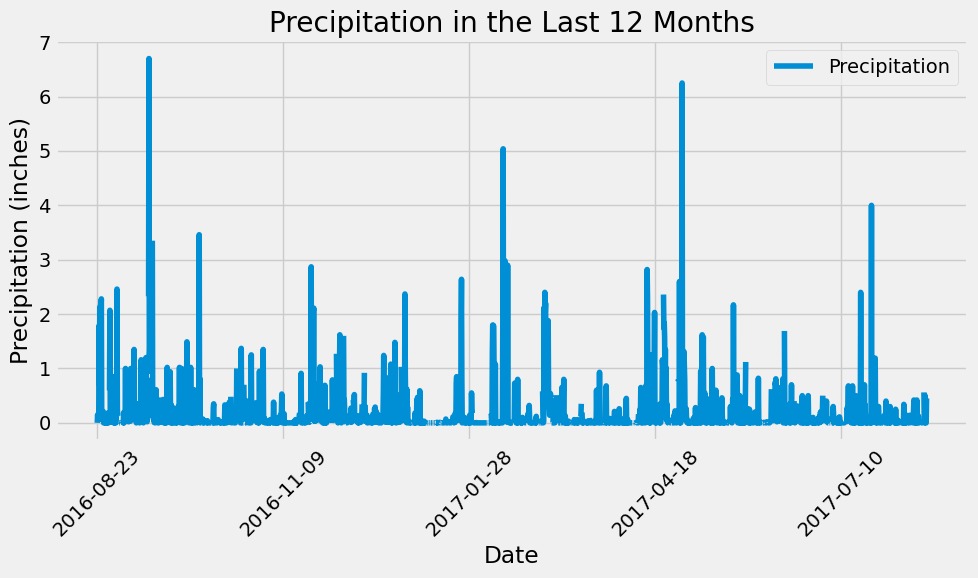

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_date = session.query(func.max(Measurement.date)).scalar()
#one_year_ago = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
df.sort_values('Date', inplace=True)

# # Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='Date', y='Precipitation', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Precipitation in the Last 12 Months')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [43]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df['Precipitation'].describe()
summary_stats

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [44]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()

total_stations

9

In [45]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Retrieve the most active station ID
most_active_station = active_stations[0][0]

# Calculate the lowest, highest, and average temperature for the most active station
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).scalar()

print(f"Lowest Temperature: {lowest_temp}°F")
print(f"Highest Temperature: {highest_temp}°F")
print(f"Average Temperature: {avg_temp}°F")

Lowest Temperature: 54.0°F
Highest Temperature: 85.0°F
Average Temperature: 71.66378066378067°F


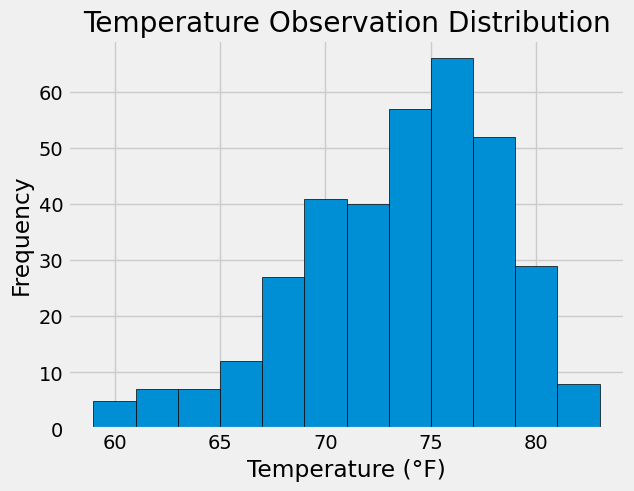

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
import matplotlib.pyplot as plt
import pandas as pd

# Query the last 12 months of temperature observation data for the most active station
temperature_data = session.query(Measurement.tobs).filter(Measurement.station == most_active_station).\
                    filter(Measurement.date >= one_year_ago).all()

# Extract temperatures from the query results
temperatures = [temp[0] for temp in temperature_data]

# Create a DataFrame to easily manipulate the data
df = pd.DataFrame(temperatures, columns=["Temperature"])

# Plot the histogram
plt.hist(df["Temperature"], bins=12, edgecolor="black")

# Add labels and title to the plot
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.title("Temperature Observation Distribution")

# Display the plot
plt.show()

# Close Session

In [16]:
# Close Session
session.close()